#Importing essential libraries for data analysis and visualization


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [30]:
sns.set_palette("pastel")

In [31]:
original_data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data for analysis/Housing.csv")

In [32]:
data=original_data.copy()

In [33]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [36]:
data.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


create a grid of box plots to visualize the distribution of numerical data in a DataFrame named numeric_data.

In [37]:
numeric_data=data.select_dtypes(["int64","float64"])

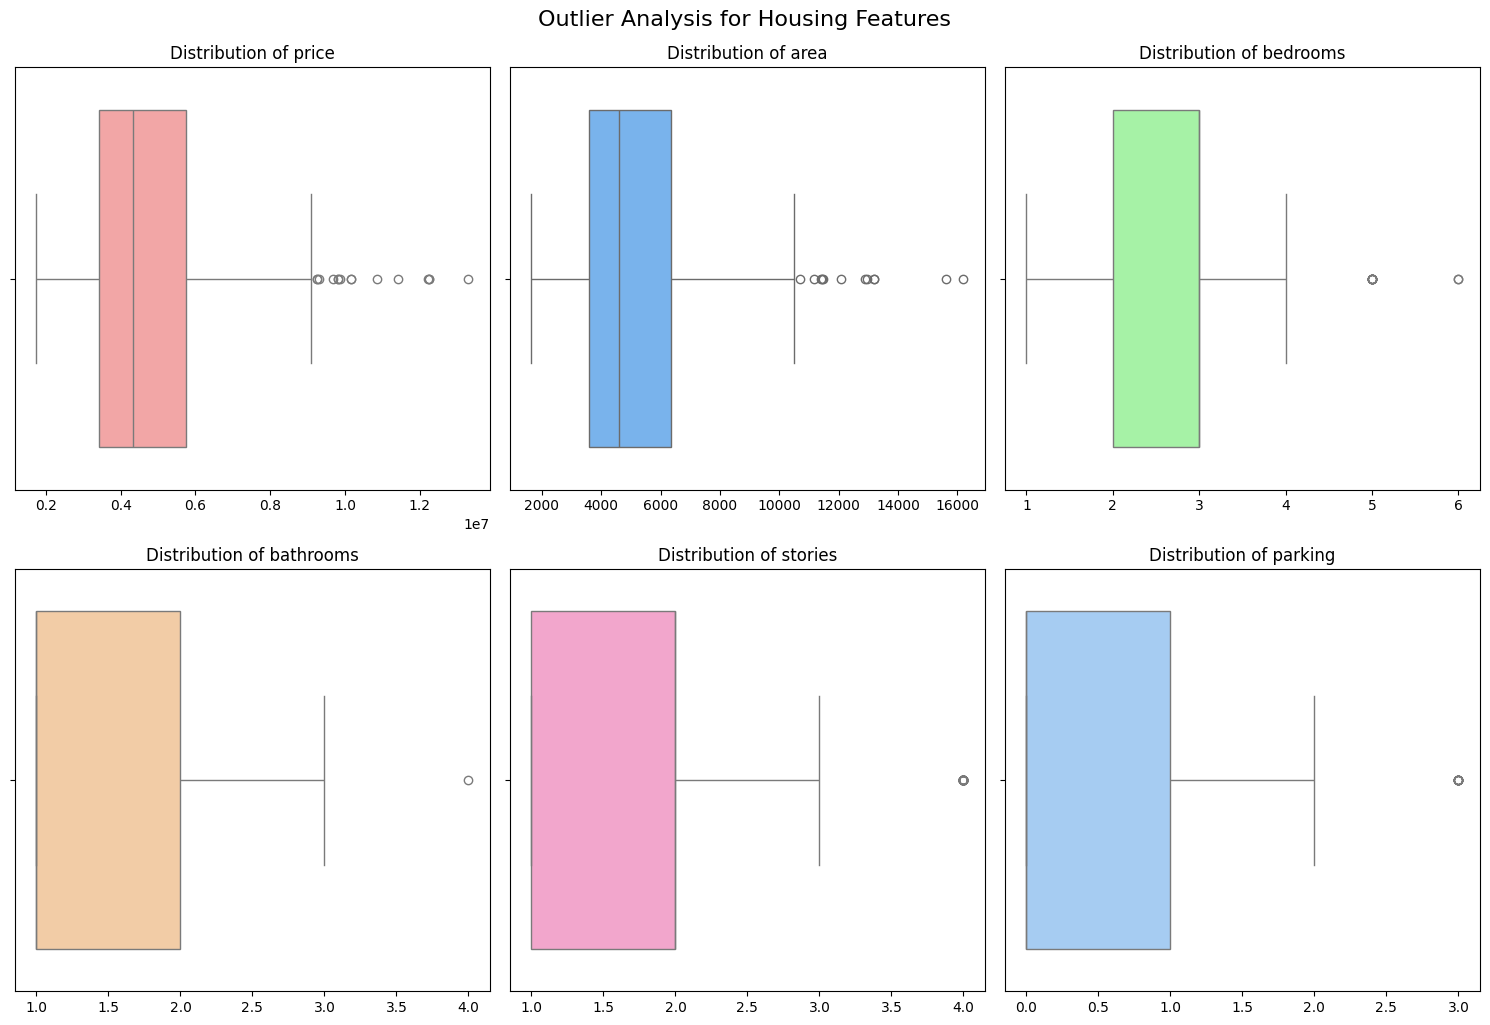

In [38]:
plt.figure(figsize=(15, 10))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff']

for i, j in enumerate(numeric_data):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=numeric_data[j], color=colors[i])
    plt.title(f'Distribution of {j}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle('Outlier Analysis for Housing Features', fontsize=16, y=1.02)
plt.show()

The values ​​shown in the boxplot can't be considered as outliers.


---



#Visualization

In [39]:
corr_matrix=numeric_data.corr()

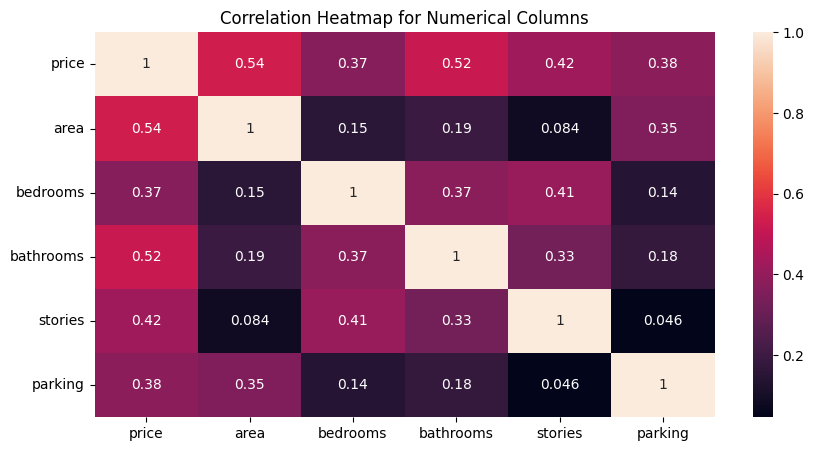

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()


From this heatmap, we can observe the correlation between the price and various factors like area, number of bedrooms, bathrooms, stories, and parking availability. The key observations regarding the price are:

Area has a moderate correlation with price (0.54), indicating that larger properties tend to be more expensive.
Bathrooms show a moderate correlation with price (0.52), meaning properties with more bathrooms are generally more expensive.
Stories have a moderate correlation of 0.42 with price, suggesting that more floors may increase the property’s price.
Parking availability has a weak correlation with price (0.38), indicating a lesser impact on price.
Number of bedrooms has a weak correlation with price (0.37), suggesting that bedroom count has a limited effect on price compared to other factors.


---



the cardinality of each column in the DataFrame is calculated to provide insights into the data distribution.

In [41]:
for i in data:
  x=data[i].value_counts()
  print(f"{i} has Unique values Count : {len(x)}")

price has Unique values Count : 219
area has Unique values Count : 284
bedrooms has Unique values Count : 6
bathrooms has Unique values Count : 4
stories has Unique values Count : 4
mainroad has Unique values Count : 2
guestroom has Unique values Count : 2
basement has Unique values Count : 2
hotwaterheating has Unique values Count : 2
airconditioning has Unique values Count : 2
parking has Unique values Count : 4
prefarea has Unique values Count : 2
furnishingstatus has Unique values Count : 3


create a new DataFrame cat_data containing only the categorical columns

In [42]:
cat_data=data[["bedrooms","bathrooms","stories","mainroad","guestroom","basement","hotwaterheating","airconditioning","parking","prefarea","furnishingstatus"]]

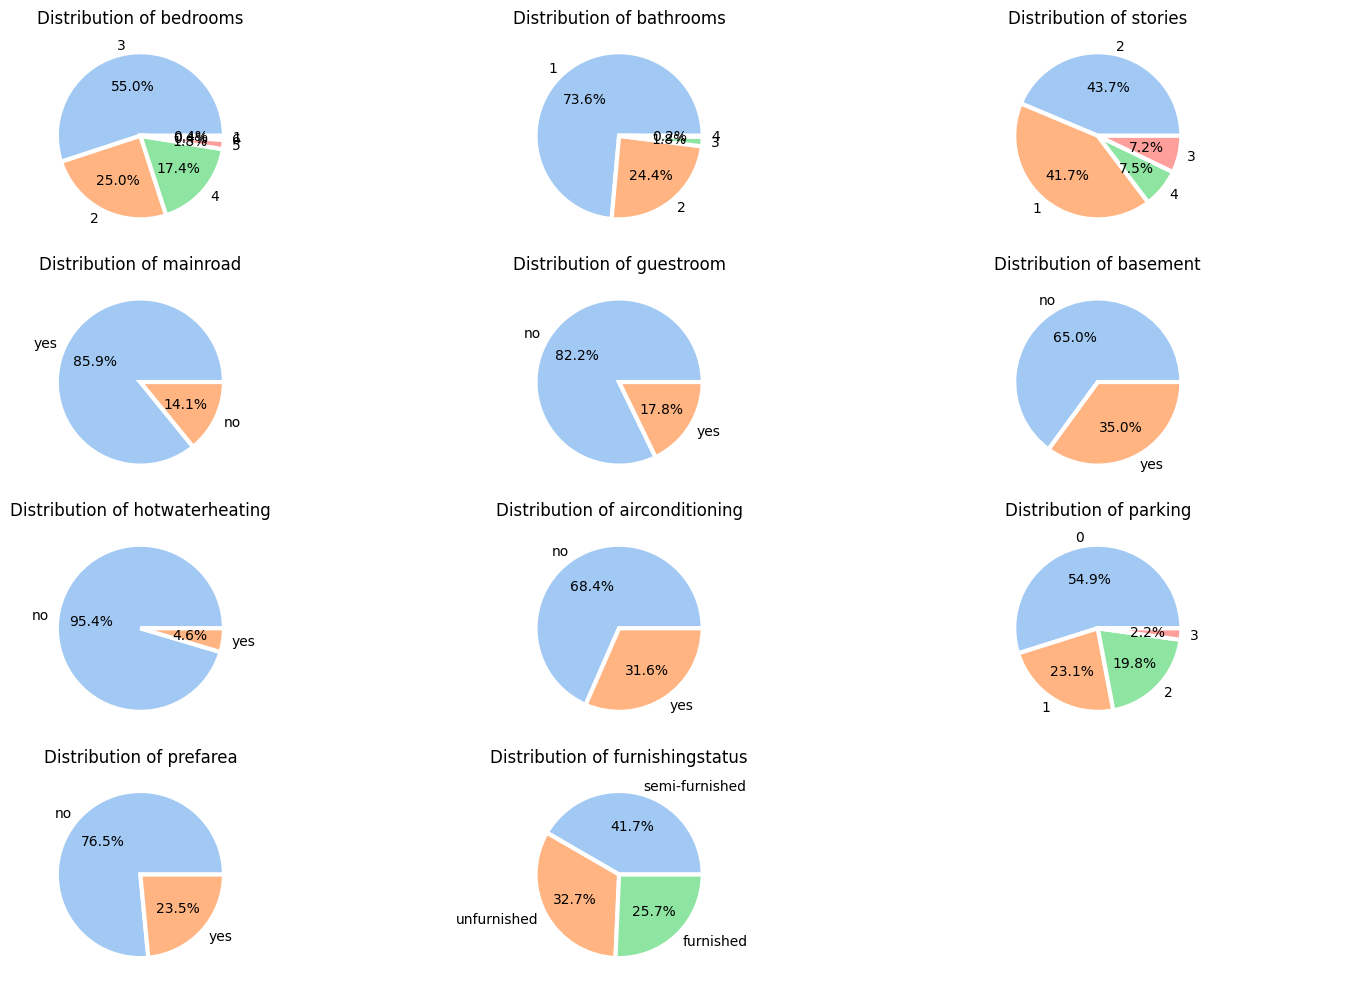

In [43]:
n_cols = len(cat_data.columns)
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(cat_data.columns):
    x = cat_data[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%', wedgeprops={"linewidth": 3, "edgecolor": "white"})
    axes[i].set_title(f"Distribution of {col}")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

###Number of Bedrooms and Bathrooms:

Most properties have 3 bedrooms (55%), indicating that 3-bedroom houses are the most common.
The majority also have only 1 bathroom (73.6%), showing that single-bathroom homes are the norm.
Additional Building Features:

A small percentage of properties have a guest room (17.8%) or a basement (35%). These features are relatively rare, suggesting that most homes are simple in structure without additional rooms like guest rooms or basements.
###Amenities and Comfort Features:

A large number of properties lack hot water heating (95.4% without this feature), indicating that this is not a standard feature in available homes.
About one-third of properties have air conditioning (31.6%), meaning it's moderately common but not a standard feature in every home.
Furnishing:

Most properties are either unfurnished (32.7%) or semi-furnished (41.7%), indicating that fully furnished homes are rare, with semi-furnished homes being more common in the market.
Location:

Only a few properties are located near main roads (14.1% near "mainroad"), which suggests that most properties are situated in quieter or more residential areas, away from main roads.
Final Summary
In general, most properties are simple in structure and amenities, with only one bathroom and three bedrooms, lacking hot water heating. They are mostly unfurnished or semi-furnished, with few located near main roads or having additional features like guest rooms or basements.


---



#Visualiz using a scatterplot plot.

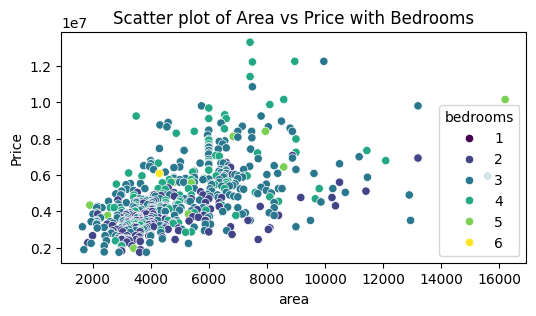

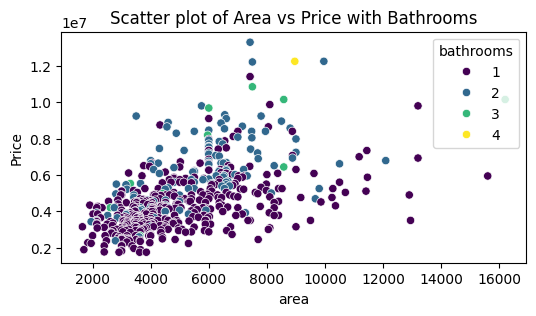

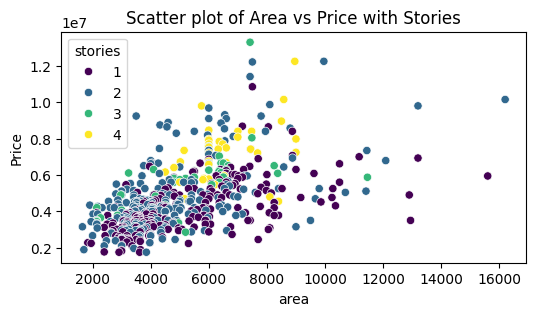

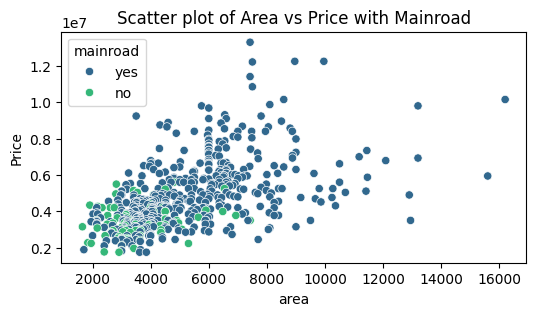

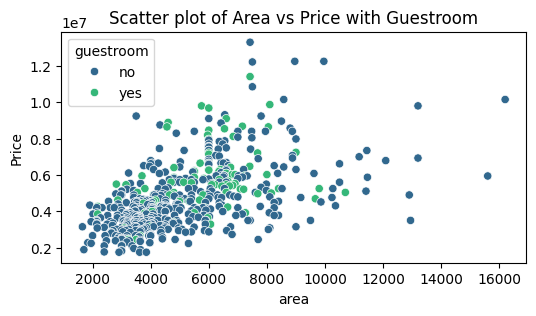

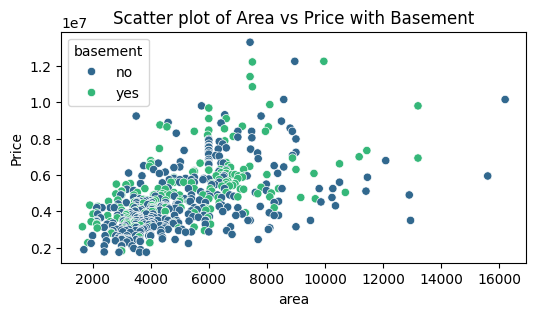

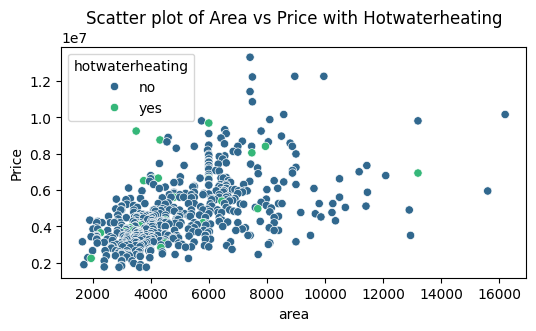

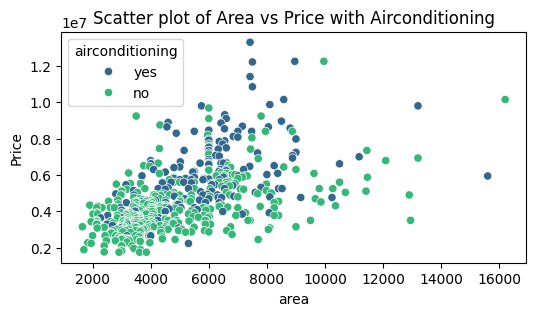

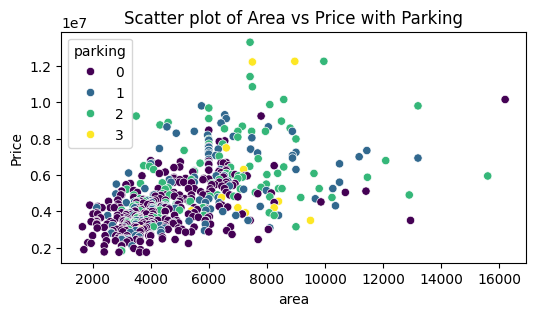

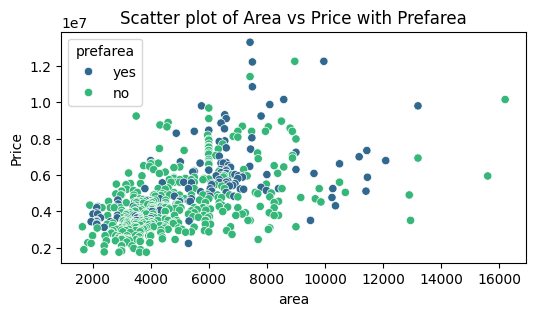

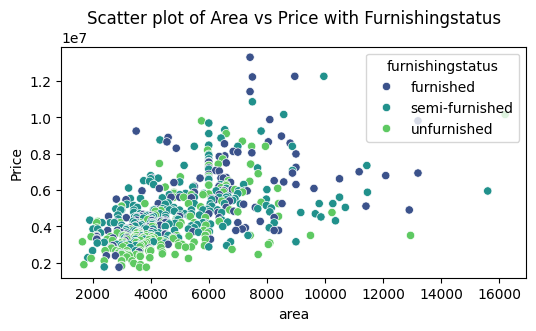

In [44]:
for i in cat_data:
  plt.figure(figsize=(6,3))

  sns.scatterplot(data=data ,x="area",y="price", hue=i, palette="viridis" )
  plt.title(f"Scatter plot of Area vs Price with {i.capitalize()}")
  plt.xlabel("area")
  plt.ylabel("Price")
  plt.show()
  print(" ")

*  Impact of Number of Bedrooms

Homes with more bedrooms tend to be larger and more expensive.
Homes with one to three bedrooms mostly fall in medium to lower area and price ranges, while homes with four or more bedrooms appear in higher ranges of area and price.
This implies that the number of bedrooms is a strong indicator of a home's size and cost, as larger homes often have more bedrooms to accommodate residents' needs.

*  Impact of Number of Bathrooms

The plot shows that homes with only one bathroom are concentrated in lower to medium ranges of area and price.
In contrast, area and price increase significantly with the addition of more bathrooms, as homes with three or four bathrooms are found in higher ranges.
This suggests that multiple bathrooms can be a key feature that elevates a home's value, as additional bathrooms provide a higher level of convenience and comfort for residents.

*  Effect of number of stores

stores plans indicate that single-store homes are generally found in lower ranges of space and price. However, more stores are not associated with increased space. However, the number of stores may be associated with increased price.

*  The effect of parking

Most homes do not have parking and in general the presence of parking is directly related to price and area.

`All other factors affect the price of the property, but their presence is not related to the area.`

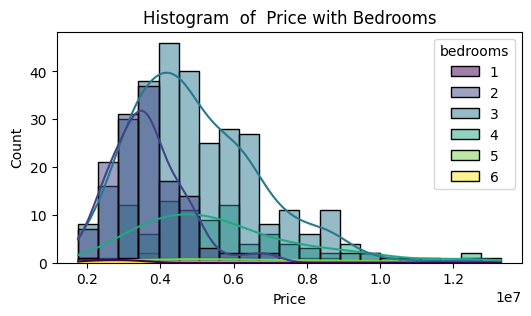

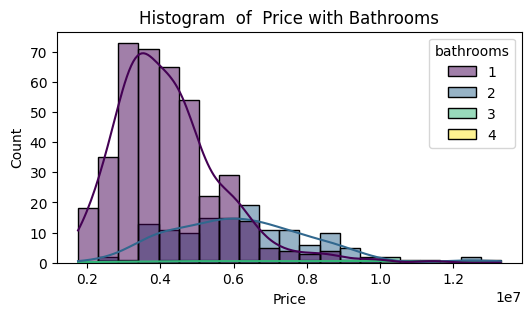

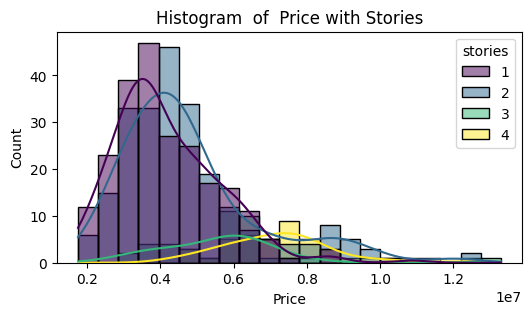

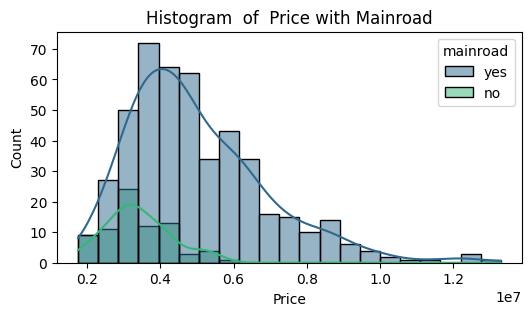

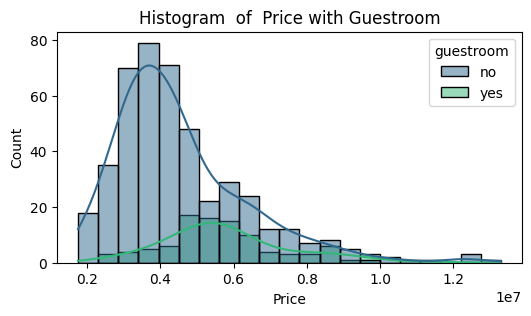

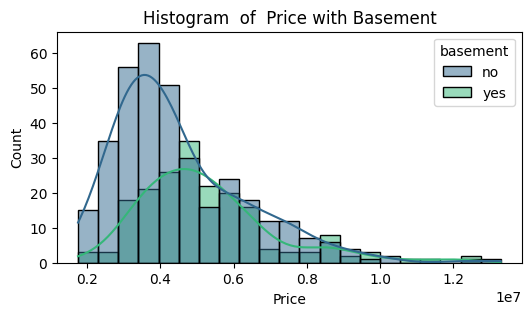

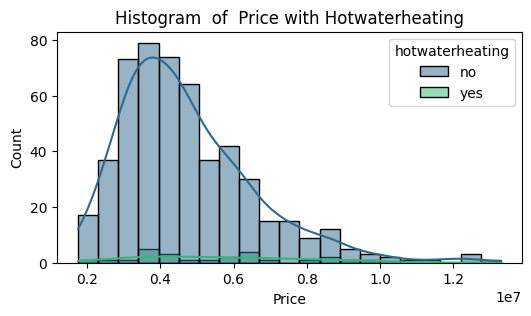

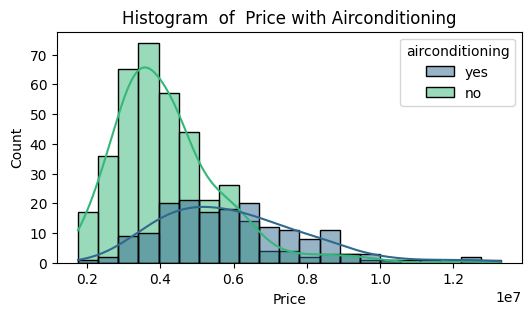

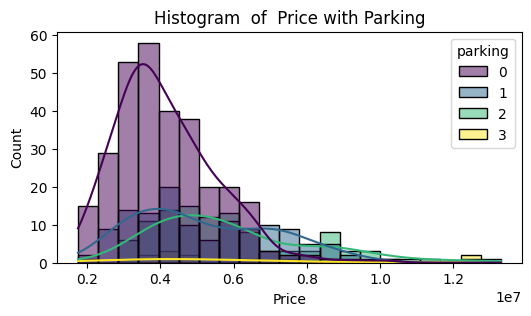

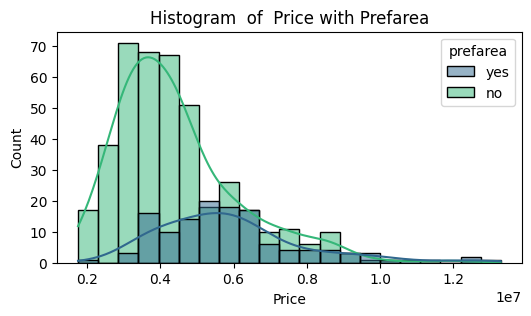

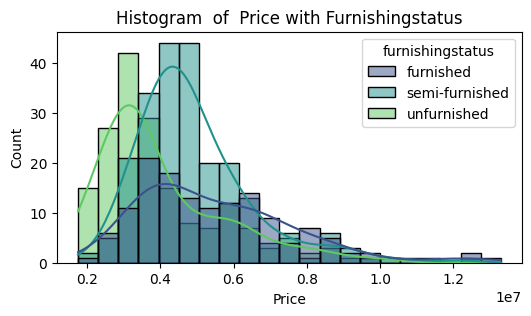

In [45]:
for i in cat_data:
  plt.figure(figsize=(6,3))
  sns.histplot(data=data ,x="price", hue=i, kde=True ,palette="viridis")
  plt.title(f"Histogram  of  Price with {i.capitalize()}")
  plt.xlabel("Price")
  plt.show()
  print(" ")

`This can be deduced from Histogram charts`

*  Most of the houses have three rooms and the price increases with the number of rooms. Apartments with six rooms are very rare.

---

*   Increasing price with increasing number of bathrooms: In general, the price of a property increases with the number of bathrooms available in it. This is logical, as bathrooms are considered essential facilities that affect the value of a property.
*   Most properties are concentrated in the category of one or two bathrooms: The graph shows that most properties have one or two bathrooms, as the highest frequency values ​​are concentrated in these two categories.
*   Decreasing number of properties with three or more bathrooms: As the number of bathrooms increases, the percentage of properties available with these specifications decreases. This means that luxury properties with multiple bathrooms are less available.

---
*  The histogram shows the distribution of building prices based on the number of stories. Most buildings are priced between 2 and 8 million (0.2 and 0.8 × 10^7). Buildings with a single story are the most common and have slightly higher prices compared to multi-story buildings, with the frequency decreasing as the number of stories increases. Buildings with four stories show very low frequency and tend to have lower prices.

---
*  The largest number of houses have direct access to the main road and there is no house that does not have access to the main road and is more expensive than 6 million

---


*  The majority of homes do not have a guest room and the presence of a guest room may be a factor influencing the price increase but it is not a major element in determining the price, as most of the price distribution is still in buildings without a guest room.

---

*  Based on the analysis of the histogram, it is evident that the number of houses without a basement is greater than the number of houses with a basement. The chart also indicates that the average price of a house with a basement is higher than the average price of a house without a basemen.


---
*  The presence of hot water in the house is considered a rare case and it has not been observed that this factor has this great impact on the price.


---


*   Most of the apartments do not have parking, and the presence of parking leads to a relative increase in the price, and the price is directly related to the increase in their number.

---




*  The peak of the price distribution for properties with a prefarea is in the 6 to 8 milions price range, while the peak for properties without this feature is in the 4 to 6 milions price range. This suggests that the presence of a prefarea is associated with a price increase in the range of 2 to 4 milions .
The distributions for properties with a prefarea exhibit a wider spread, indicating a greater variation in prices between properties with and without this feature.

---
*  Furnished category: This category shows a higher price distribution, with a notable concentration between 3 to 5 million, and fewer properties at the higher end.

*  Semi-furnished category: Prices are mostly concentrated below 4 million, peaking between 2 to 3 million.

*  Unfurnished category: This category has a strong distribution at lower prices, with the highest counts within the 2 million range.


---





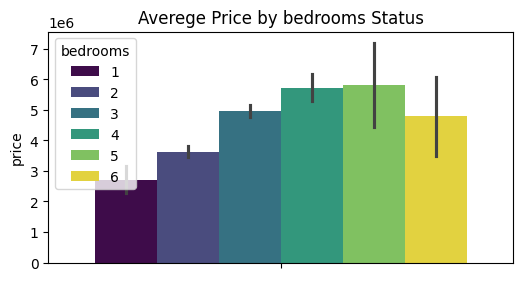

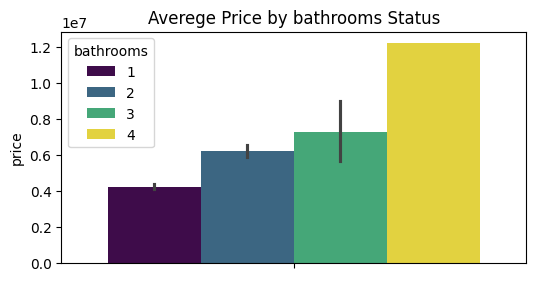

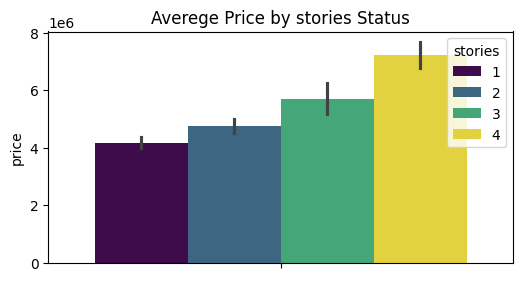

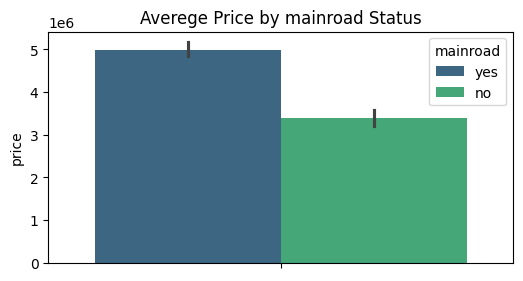

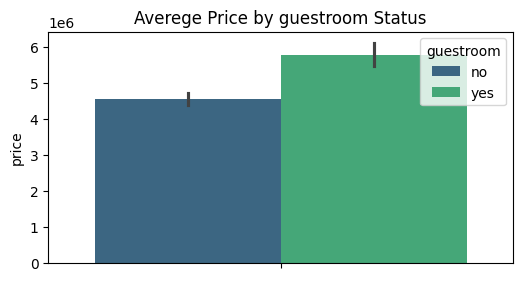

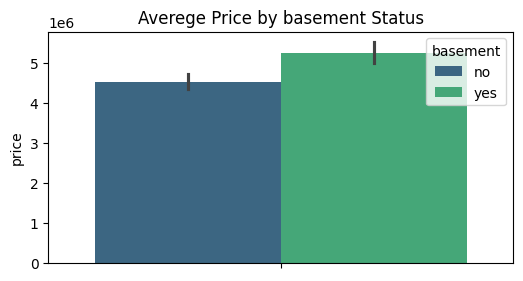

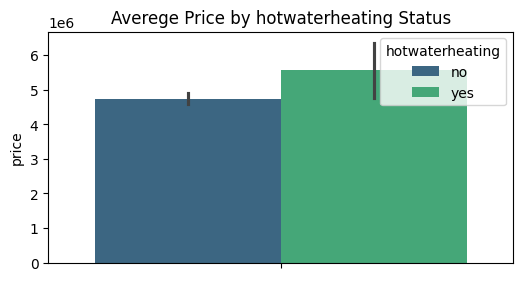

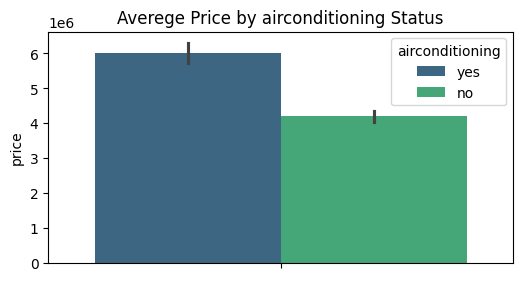

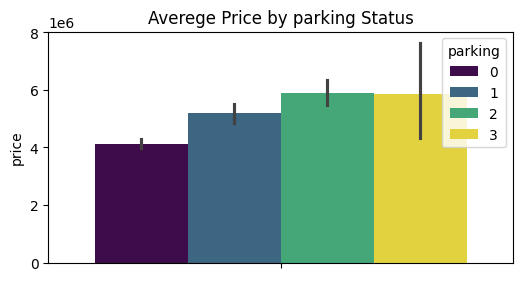

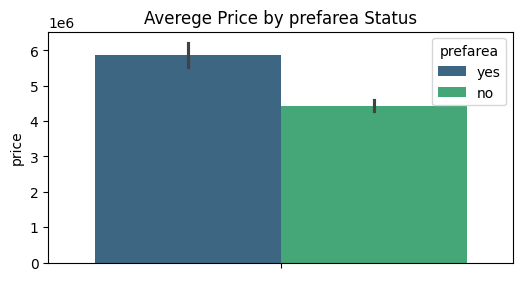

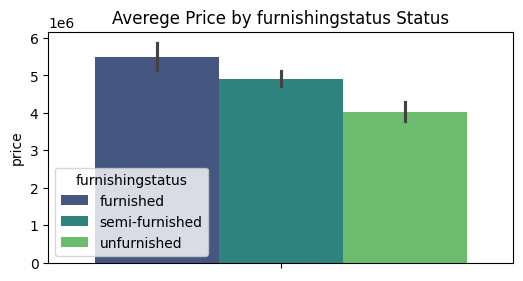

In [46]:
for i in cat_data:
 plt.figure(figsize=(6,3))
 sns.barplot(data=data , y="price", hue=i , palette="viridis")
 plt.title(f"Averege Price by {i} Status")
 plt.ylabel("price")
 plt.show()
 print(" ")

##Conclusion after analyzing all the previous charts

* Most houses have three rooms, and prices increase with the number of rooms. Six-room apartments are rare.
* Price generally increases with the number of bathrooms, with most properties having one or two bathrooms.
* Properties with three or more bathrooms are less common, indicating a scarcity of luxury properties.
* Most buildings are priced between 2 and 8 million, with single-story buildings being the most common.
* Most homes have direct access to the main road, and none without access exceed 6 million in price.
* The majority of homes lack a guest room; its presence may increase price, though not significantly.
* Houses without a basement are more common, but houses with a basement are generally priced higher.
* The presence of hot water in houses is rare and does not significantly affect price.
* Most apartments lack parking, and the presence of parking leads to a slight price increase.
* Properties with a prefarea feature have prices peaking between 6 and 8 million, while those without peak between 4 and 6 million.
* Furnished homes have prices concentrated between 3 and 5 million, semi-furnished homes peak between 2 and 3 million, and unfurnished homes have the highest counts around 2 million.

---



In [47]:
cat_data

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


#Encoding

Encode all columns containing Yes and No.

In [48]:
yes_no={"no":0, "yes":1}
data = data.map(lambda x: yes_no.get(x, x))

In [49]:
furnishingstatus={"unfurnished":0, "semi-furnished":1, "furnished":2 }
data["furnishingstatus"]=data["furnishingstatus"].apply(lambda x : furnishingstatus[x] )

#Scaling

In [50]:
data_max=data.max()

In [51]:
data=data.divide(data_max)

In [52]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.458025,0.666667,0.50,0.75,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,0.921053,0.553086,0.666667,1.00,1.00,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,0.921053,0.614815,0.500000,0.50,0.50,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.918421,0.462963,0.666667,0.50,0.50,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,0.857895,0.458025,0.666667,0.25,0.50,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.136842,0.185185,0.333333,0.25,0.25,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0
541,0.132868,0.148148,0.500000,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.131579,0.223457,0.333333,0.25,0.25,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
543,0.131579,0.179630,0.500000,0.25,0.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [53]:
data.to_csv('Housing_after_processing.csv', index=False)